In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OrdinalEncoder,
)

In [20]:
df = pd.read_csv("laptops-v1.csv")


In [21]:
df.head()


,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,344.99


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                791 non-null    object 
 1   Model                791 non-null    object 
 2   Type                 791 non-null    object 
 3   Dimension (in)       717 non-null    float64
 4   Screen Resolution    791 non-null    object 
 5   CPU Brand            791 non-null    object 
 6   CPU Model            791 non-null    object 
 7   CPU Frequency (GHz)  791 non-null    float64
 8   GPU Brand            791 non-null    object 
 9   GPU Model            742 non-null    object 
 10  RAM (GB)             791 non-null    int64  
 11  HDD                  791 non-null    bool   
 12  SSD                  791 non-null    bool   
 13  OS                   791 non-null    object 
 14  Weight (kg)          742 non-null    float64
 15  Price (Euro)         781 non-null    flo

In [23]:
df.isnull().sum()


Brand                   0
Model                   0
Type                    0
Dimension (in)         74
Screen Resolution       0
CPU Brand               0
CPU Model               0
CPU Frequency (GHz)     0
GPU Brand               0
GPU Model              49
RAM (GB)                0
HDD                     0
SSD                     0
OS                      0
Weight (kg)            49
Price (Euro)           10
dtype: int64

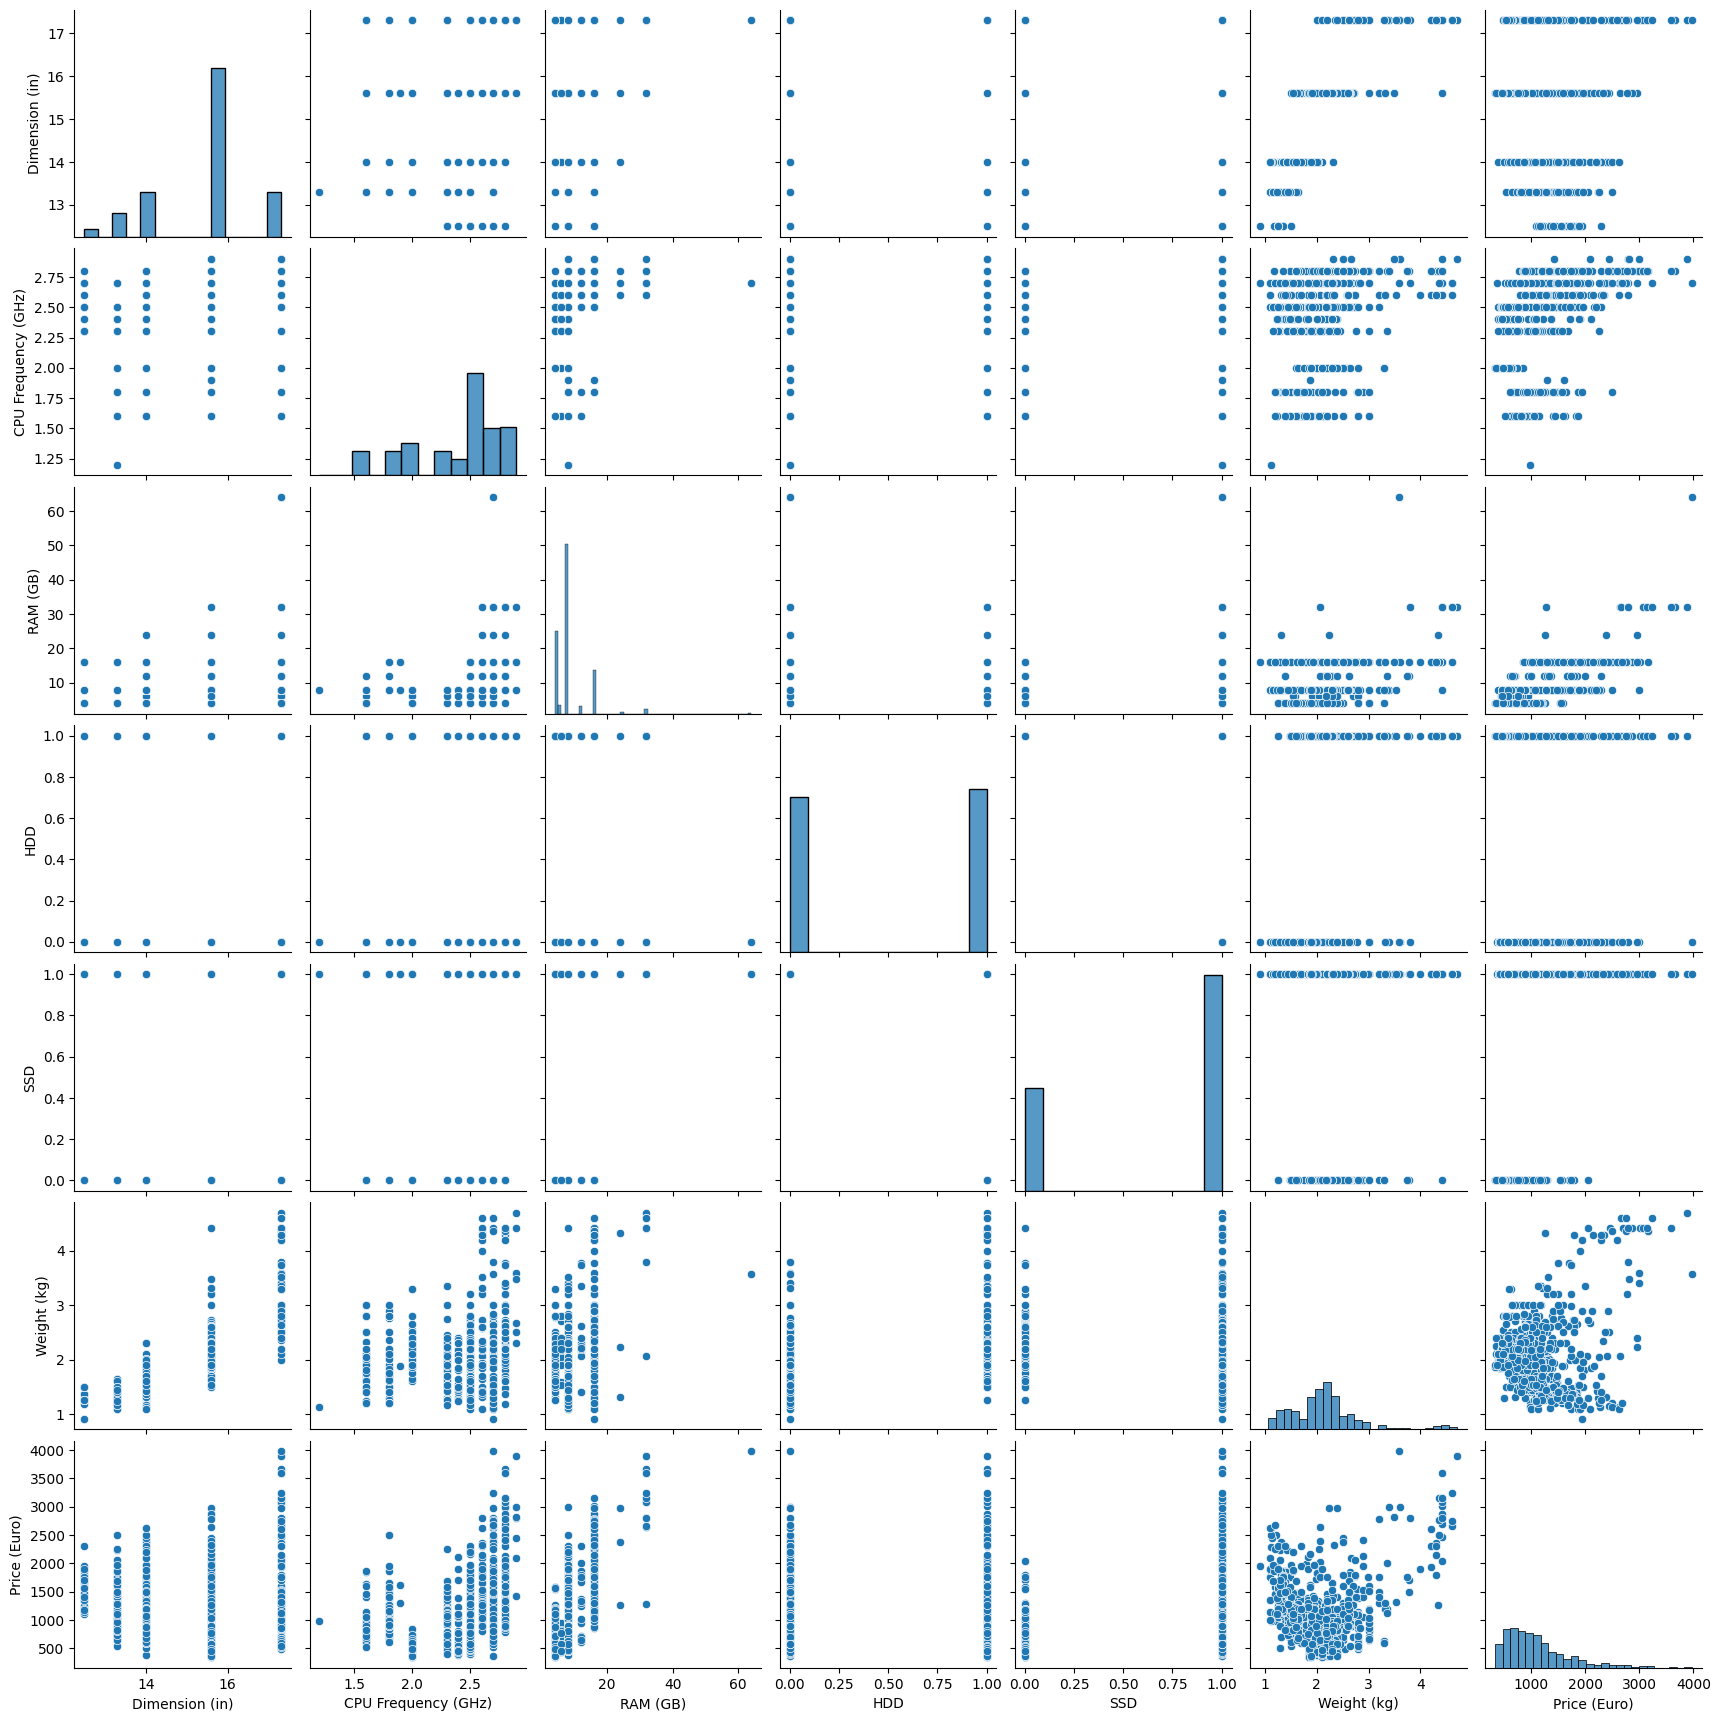

In [24]:
sns.pairplot(df)


<Axes: >

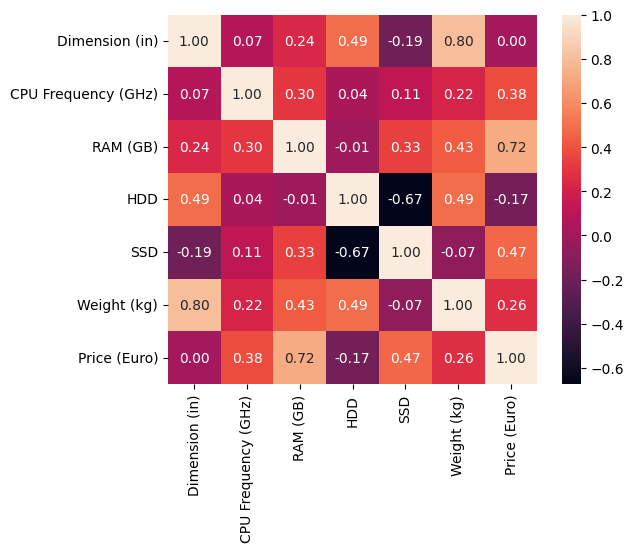

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)


<Axes: >

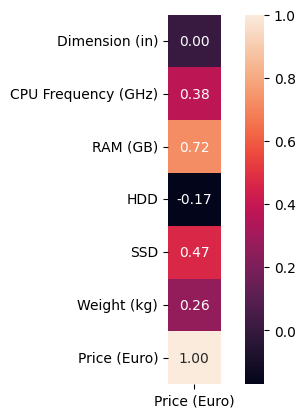

In [26]:
sns.heatmap(df.corr(numeric_only=True)[["Price (Euro)"]], annot=True, fmt=".2f", square=True)


In [27]:
df.isnull().sum()


Brand                   0
Model                   0
Type                    0
Dimension (in)         74
Screen Resolution       0
CPU Brand               0
CPU Model               0
CPU Frequency (GHz)     0
GPU Brand               0
GPU Model              49
RAM (GB)                0
HDD                     0
SSD                     0
OS                      0
Weight (kg)            49
Price (Euro)           10
dtype: int64

In [28]:
df.head()


,Brand,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro)
0,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00
1,Asus,ZenBook UX430UN,Ultrabook,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00
2,Acer,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00
3,HP,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90
4,HP,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,344.99


In [29]:
df = pd.concat([df, pd.get_dummies(df["Brand"])], axis=1)
df.drop(columns=["Brand"], inplace=True)

In [30]:
df.head()


,Model,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),Acer,Asus,Dell,HP,Lenovo
0,250 G6,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00,False,False,False,True,False
1,ZenBook UX430UN,Ultrabook,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00,False,True,False,False,False
2,Swift 3,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00,True,False,False,False,False
3,250 G6,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90,False,False,False,True,False
4,250 G6,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,344.99,False,False,False,True,False


In [31]:
df.drop(columns=["Model"], inplace=True)


In [32]:
df.head()


,Type,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),Acer,Asus,Dell,HP,Lenovo
0,Notebook,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00,False,False,False,True,False
1,Ultrabook,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00,False,True,False,False,False
2,Ultrabook,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00,True,False,False,False,False
3,Notebook,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90,False,False,False,True,False
4,Notebook,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,344.99,False,False,False,True,False


In [33]:
df = pd.concat([df, pd.get_dummies(df["Type"])], axis=1)
df.drop(columns=["Type"], inplace=True)

In [35]:
"""
Зошто правиме One-Hot / Dummy за Brand и Type, а ја бришеме колоната Model?
✅ 1. Brand и Type имаат мал број категории
На пример:
Brand = HP, Asus, Acer, Dell… (10–20 категории)
Type = Notebook, Ultrabook, Gaming… (5–10 категории)

Со 1-hot encoding:
„Brand_HP“, „Brand_Asus“, „Type_Notebook“, „Type_Ultrabook“ и сл.
Ова е нормално и НЕ создава премногу нови колони.

❌ 2. Моделот („Model“) има огромен број уникатни вредности
Пример:
ZenBook UX430UN
Swift 3
Pavilion 15
IdeaPad 330
Aspire 5
VivoBook S15
и уште стотици различни модел имиња.

Ако направиш One-Hot за Model, ќе добиеш:
Model_ZenBookUX430UN
Model_Swift3
…
Тоа ќе создаде:
Огромен број dummy колони (може 200+)
Sparse матрица
Преоптерување на моделот
Overfitting (моделот ќе ги учи имињата, а не карактеристиките)

Затоа во повеќето ML задачи колоната Model се брише — нема корисна аналитичка вредност, само текст што го опишува производот по име."""

'\nЗошто правиме One-Hot / Dummy за Brand и Type, а ја бришеме колоната Model?\n✅ 1. Brand и Type имаат мал број категории\nНа пример:\nBrand = HP, Asus, Acer, Dell… (10–20 категории)\nType = Notebook, Ultrabook, Gaming… (5–10 категории)\n\nСо 1-hot encoding:\n„Brand_HP“, „Brand_Asus“, „Type_Notebook“, „Type_Ultrabook“ и сл.\nОва е нормално и НЕ создава премногу нови колони.\n\n❌ 2. Моделот („Model“) има огромен број уникатни вредности\nПример:\nZenBook UX430UN\nSwift 3\nPavilion 15\nIdeaPad 330\nAspire 5\nVivoBook S15\nи уште стотици различни модел имиња.\n\nАко направиш One-Hot за Model, ќе добиеш:\nModel_ZenBookUX430UN\nModel_Swift3\n…\nТоа ќе создаде:\nОгромен број dummy колони (може 200+)\nSparse матрица\nПреоптерување на моделот\nOverfitting (моделот ќе ги учи имињата, а не карактеристиките)\n\nЗатоа во повеќето ML задачи колоната Model се брише — нема корисна аналитичка вредност, само текст што го опишува производот по име.'

In [36]:
df.head()


,Dimension (in),Screen Resolution,CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,...,Weight (kg),Price (Euro),Acer,Asus,Dell,HP,Lenovo,Gaming,Notebook,Ultrabook
0,15.6,1920x1080,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,...,1.86,575.00,False,False,False,True,False,False,True,False
1,NaN,1920x1080,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,...,1.30,1495.00,False,True,False,False,False,False,False,True
2,14.0,1920x1080,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,...,1.60,770.00,True,False,False,False,False,False,False,True
3,15.6,1366x768,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,...,1.86,393.90,False,False,False,True,False,False,True,False
4,15.6,1920x1080,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,...,1.86,344.99,False,False,False,True,False,False,True,False


In [37]:
df[["Width", "Height"]] = df["Screen Resolution"].str.split("x").tolist()
df["Width"] = df["Width"].astype(int)
df["Height"] = df["Height"].astype(int)
df.drop(columns=["Screen Resolution"], inplace=True)

In [38]:
df.head()


,Dimension (in),CPU Brand,CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,...,Acer,Asus,Dell,HP,Lenovo,Gaming,Notebook,Ultrabook,Width,Height
0,15.6,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,...,False,False,False,True,False,False,True,False,1920,1080
1,NaN,Intel,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,...,False,True,False,False,False,False,False,True,1920,1080
2,14.0,Intel,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,...,True,False,False,False,False,False,False,True,1920,1080
3,15.6,Intel,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,...,False,False,False,True,False,False,True,False,1366,768
4,15.6,Intel,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,...,False,False,False,True,False,False,True,False,1920,1080


In [39]:
df["CPU Brand"].unique()


array(['Intel'], dtype=object)

In [40]:
df.drop(columns=["CPU Brand"], inplace=True)


In [41]:
df.head()


,Dimension (in),CPU Model,CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),...,Acer,Asus,Dell,HP,Lenovo,Gaming,Notebook,Ultrabook,Width,Height
0,15.6,Core i5 7200U,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,...,False,False,False,True,False,False,True,False,1920,1080
1,NaN,Core i7 8550U,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,...,False,True,False,False,False,False,False,True,1920,1080
2,14.0,Core i5 8250U,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,...,True,False,False,False,False,False,False,True,1920,1080
3,15.6,Core i5 7200U,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,...,False,False,False,True,False,False,True,False,1366,768
4,15.6,Core i3 6006U,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,...,False,False,False,True,False,False,True,False,1920,1080


In [42]:
df["CPU Model"].unique()


array(['Core i5 7200U', 'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U',
       'Core i7 7500U', 'Core i3 7100U', 'Core i5 7300HQ',
       'Core i7 8650U', 'Core i3 7130U', 'Core i7 7700HQ',
       'Core i7 7560U', 'Core i5 7500U', 'Core i5 7Y54', 'Core i5 6200U',
       'Core i7 7820HK', 'Core i5 7300U', 'Core i7 7600U',
       'Core i7 6500U', 'Core i7 7820HQ', 'Core i5 7440HQ',
       'Core i7 6600U', 'Core i7 6700HQ', 'Core i3 6100U',
       'Core i7 6820HK', 'Core i5 6300U', 'Core i5 6300HQ',
       'Core i7 6820HQ', 'Core i7 7660U'], dtype=object)

In [43]:
df["CPU Series"] = df["CPU Model"].str[6:7].astype(int)
df.drop(columns=["CPU Model"], inplace=True)

In [44]:
df.head()


,Dimension (in),CPU Frequency (GHz),GPU Brand,GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),...,Asus,Dell,HP,Lenovo,Gaming,Notebook,Ultrabook,Width,Height,CPU Series
0,15.6,2.5,Intel,HD Graphics 620,8,False,True,No OS,1.86,575.00,...,False,False,True,False,False,True,False,1920,1080,5
1,NaN,1.8,Nvidia,GeForce MX150,16,False,True,Windows,1.30,1495.00,...,True,False,False,False,False,False,True,1920,1080,7
2,14.0,1.6,Intel,UHD Graphics 620,8,False,True,Windows,1.60,770.00,...,False,False,False,False,False,False,True,1920,1080,5
3,15.6,2.5,Intel,HD Graphics 620,4,True,False,No OS,1.86,393.90,...,False,False,True,False,False,True,False,1366,768,5
4,15.6,2.0,Intel,HD Graphics 520,4,True,False,No OS,1.86,344.99,...,False,False,True,False,False,True,False,1920,1080,3


In [45]:
#od 'Core i5 7200U', 'Core i7 8550U', 'Core i5 8250U', 'Core i3 6006U',
#       'Core i7 7500U', 'Core i3 7100U', 'Core i5 7300HQ',
#stana
#5
#7
#5
#...

In [46]:
df["GPU Brand"].unique()


array(['Intel', 'Nvidia', 'AMD'], dtype=object)

In [47]:
df = pd.concat([df, pd.get_dummies(df["GPU Brand"])], axis=1)
df.drop(columns=["GPU Brand"], inplace=True)

In [48]:
df.head()


,Dimension (in),CPU Frequency (GHz),GPU Model,RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),Acer,...,Lenovo,Gaming,Notebook,Ultrabook,Width,Height,CPU Series,AMD,Intel,Nvidia
0,15.6,2.5,HD Graphics 620,8,False,True,No OS,1.86,575.00,False,...,False,False,True,False,1920,1080,5,False,True,False
1,NaN,1.8,GeForce MX150,16,False,True,Windows,1.30,1495.00,False,...,False,False,False,True,1920,1080,7,False,False,True
2,14.0,1.6,UHD Graphics 620,8,False,True,Windows,1.60,770.00,True,...,False,False,False,True,1920,1080,5,False,True,False
3,15.6,2.5,HD Graphics 620,4,True,False,No OS,1.86,393.90,False,...,False,False,True,False,1366,768,5,False,True,False
4,15.6,2.0,HD Graphics 520,4,True,False,No OS,1.86,344.99,False,...,False,False,True,False,1920,1080,3,False,True,False


In [49]:
df["GPU Model"].unique()
#mn dga=drop

array(['HD Graphics 620', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon R5 M430', 'GeForce 940MX',
       'GeForce GTX 1050', 'Radeon 530', 'GeForce 930MX',
       'GeForce GTX 1060', nan, 'Radeon 520', 'GeForce GTX 1050 Ti',
       'GeForce MX130', 'GeForce GTX 940MX', 'Iris Plus Graphics 640',
       'GeForce 920MX', 'Radeon R7 M445', 'GeForce GTX 1050M',
       'R17M-M1-70', 'GeForce 150MX', 'HD Graphics 615',
       'GeForce GTX 950M', 'GeForce GTX 1080', 'GeForce GTX 980M',
       'GeForce GTX 1070', 'Radeon RX 550', 'HD Graphics',
       'GeForce GT 940MX', 'HD Graphics 630', 'Quadro M2200M',
       'Radeon R7 M460', 'FirePro W4190M', 'HD Graphics 530',
       'GeForce GTX 965M', 'GeForce GTX1080', 'GeForce GTX1050 Ti',
       'GeForce GTX 960M', 'Radeon R5 M420', 'Quadro M620M',
       'GeForce GTX 960<U+039C>', 'Graphics 620', 'GeForce GTX 960',
       'Radeon R5 520', 'Quadro M2000M', 'GeForce GTX 1070M',
       'GeForce GTX1060', 'Radeon R5 M420X', 'G

In [50]:
df.drop(columns=["GPU Model"], inplace=True)


In [51]:
df.head()


,Dimension (in),CPU Frequency (GHz),RAM (GB),HDD,SSD,OS,Weight (kg),Price (Euro),Acer,Asus,...,Lenovo,Gaming,Notebook,Ultrabook,Width,Height,CPU Series,AMD,Intel,Nvidia
0,15.6,2.5,8,False,True,No OS,1.86,575.00,False,False,...,False,False,True,False,1920,1080,5,False,True,False
1,NaN,1.8,16,False,True,Windows,1.30,1495.00,False,True,...,False,False,False,True,1920,1080,7,False,False,True
2,14.0,1.6,8,False,True,Windows,1.60,770.00,True,False,...,False,False,False,True,1920,1080,5,False,True,False
3,15.6,2.5,4,True,False,No OS,1.86,393.90,False,False,...,False,False,True,False,1366,768,5,False,True,False
4,15.6,2.0,4,True,False,No OS,1.86,344.99,False,False,...,False,False,True,False,1920,1080,3,False,True,False


In [52]:
df["OS"].unique()
#malku se pa zemi podeli gi

array(['No OS', 'Windows', 'Linux'], dtype=object)

In [53]:
df = pd.concat([df, pd.get_dummies(df["OS"])], axis=1)
df.drop(columns=["OS"], inplace=True)

In [54]:
df.head()


,Dimension (in),CPU Frequency (GHz),RAM (GB),HDD,SSD,Weight (kg),Price (Euro),Acer,Asus,Dell,...,Ultrabook,Width,Height,CPU Series,AMD,Intel,Nvidia,Linux,No OS,Windows
0,15.6,2.5,8,False,True,1.86,575.00,False,False,False,...,False,1920,1080,5,False,True,False,False,True,False
1,NaN,1.8,16,False,True,1.30,1495.00,False,True,False,...,True,1920,1080,7,False,False,True,False,False,True
2,14.0,1.6,8,False,True,1.60,770.00,True,False,False,...,True,1920,1080,5,False,True,False,False,False,True
3,15.6,2.5,4,True,False,1.86,393.90,False,False,False,...,False,1366,768,5,False,True,False,False,True,False
4,15.6,2.0,4,True,False,1.86,344.99,False,False,False,...,False,1920,1080,3,False,True,False,False,True,False


In [55]:
df.isnull().sum()


Dimension (in)         74
CPU Frequency (GHz)     0
RAM (GB)                0
HDD                     0
SSD                     0
Weight (kg)            49
Price (Euro)           10
Acer                    0
Asus                    0
Dell                    0
HP                      0
Lenovo                  0
Gaming                  0
Notebook                0
Ultrabook               0
Width                   0
Height                  0
CPU Series              0
AMD                     0
Intel                   0
Nvidia                  0
Linux                   0
No OS                   0
Windows                 0
dtype: int64

<Axes: >

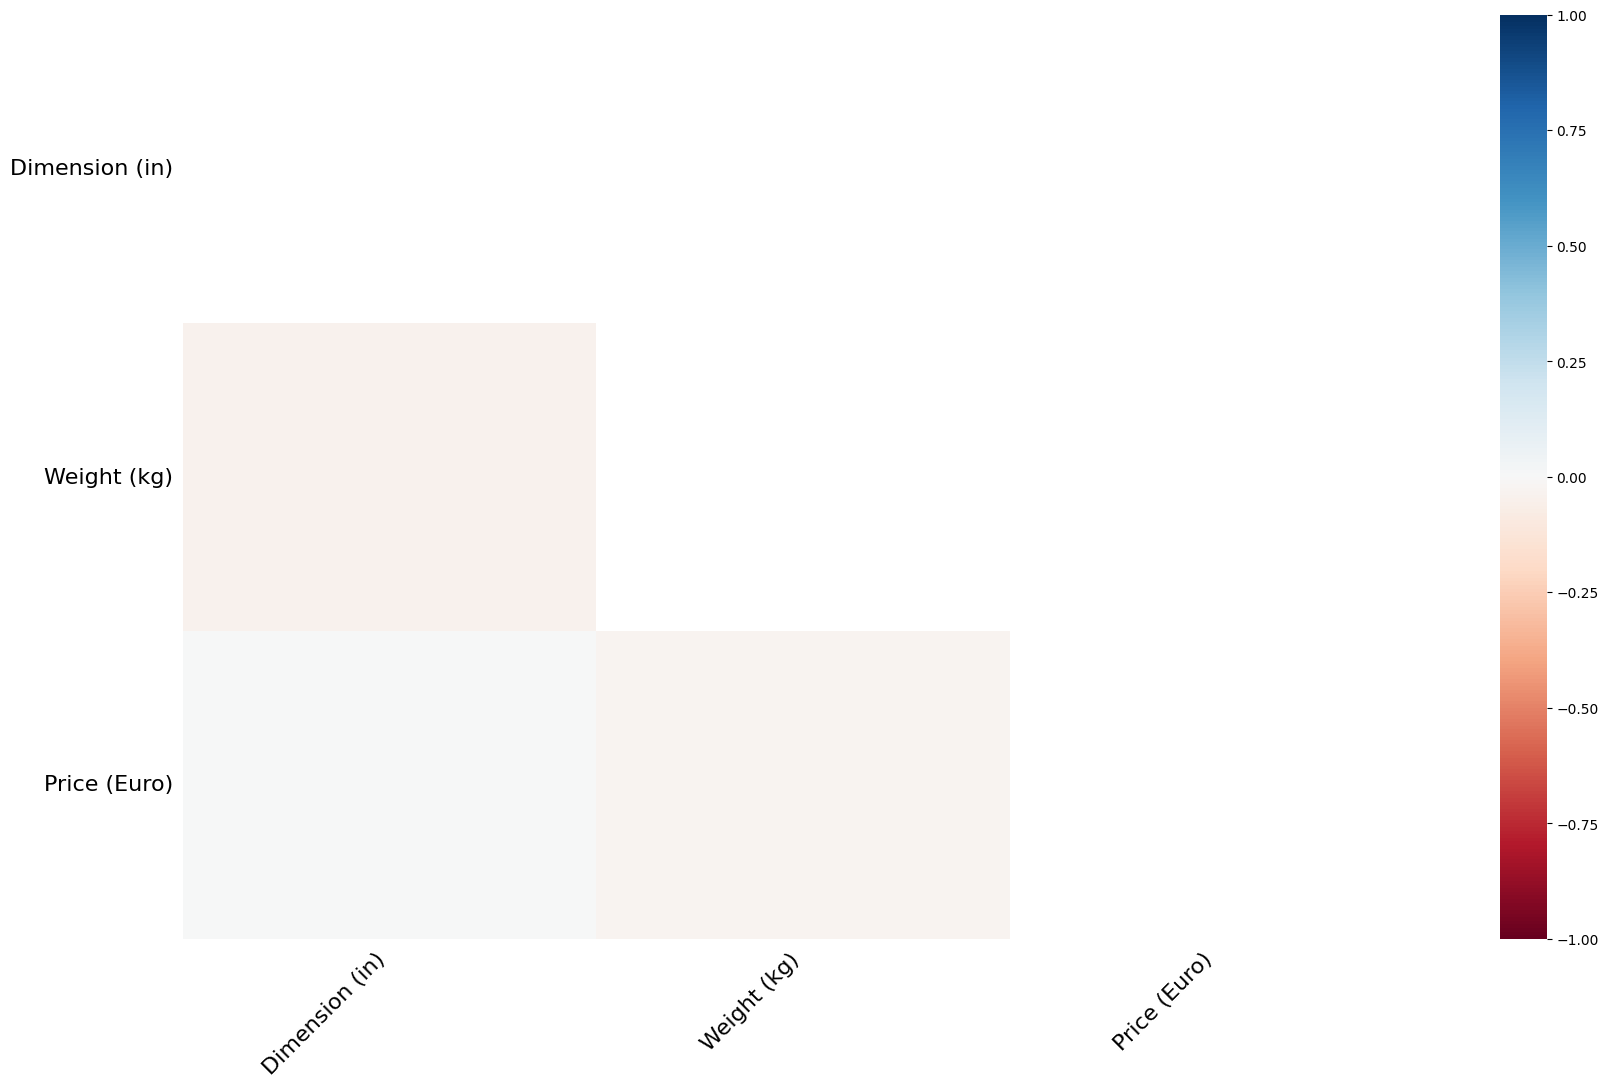

In [56]:
msno.heatmap(df)


<Axes: >

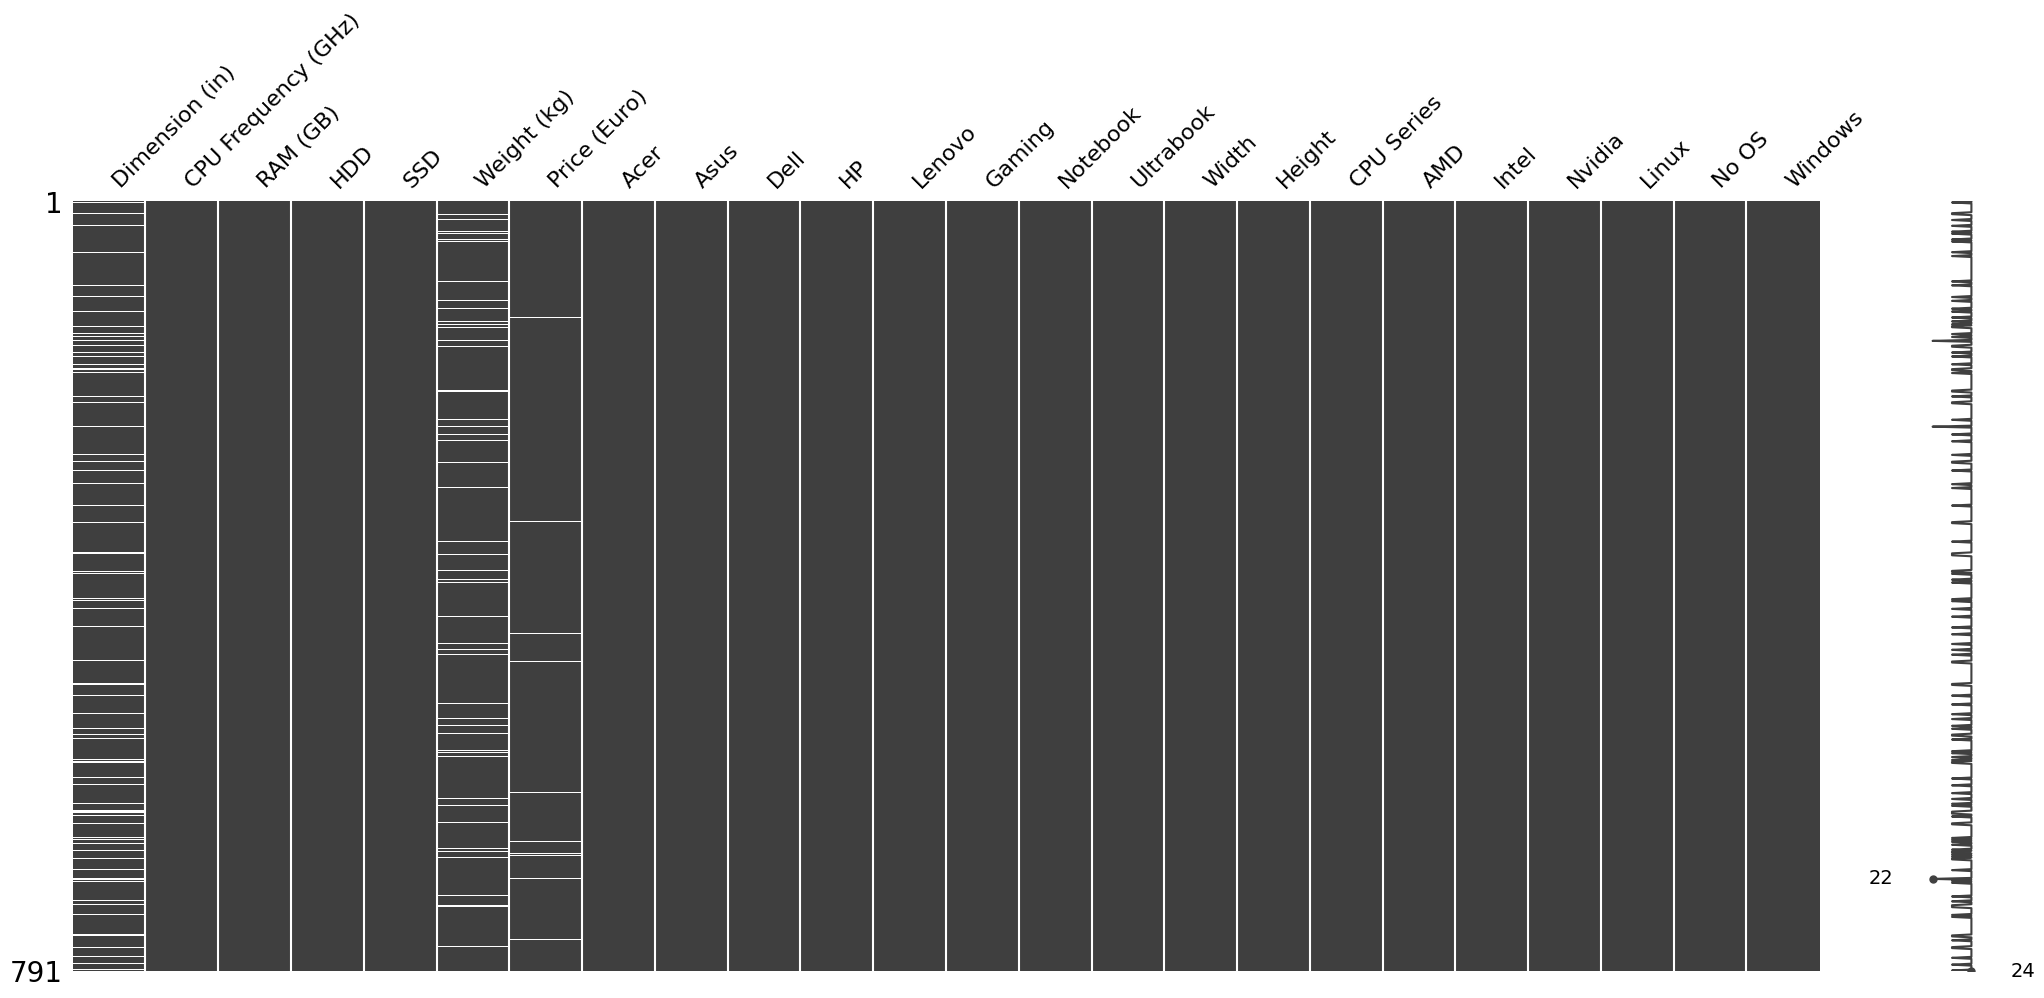

In [57]:
msno.matrix(df)


<Axes: >

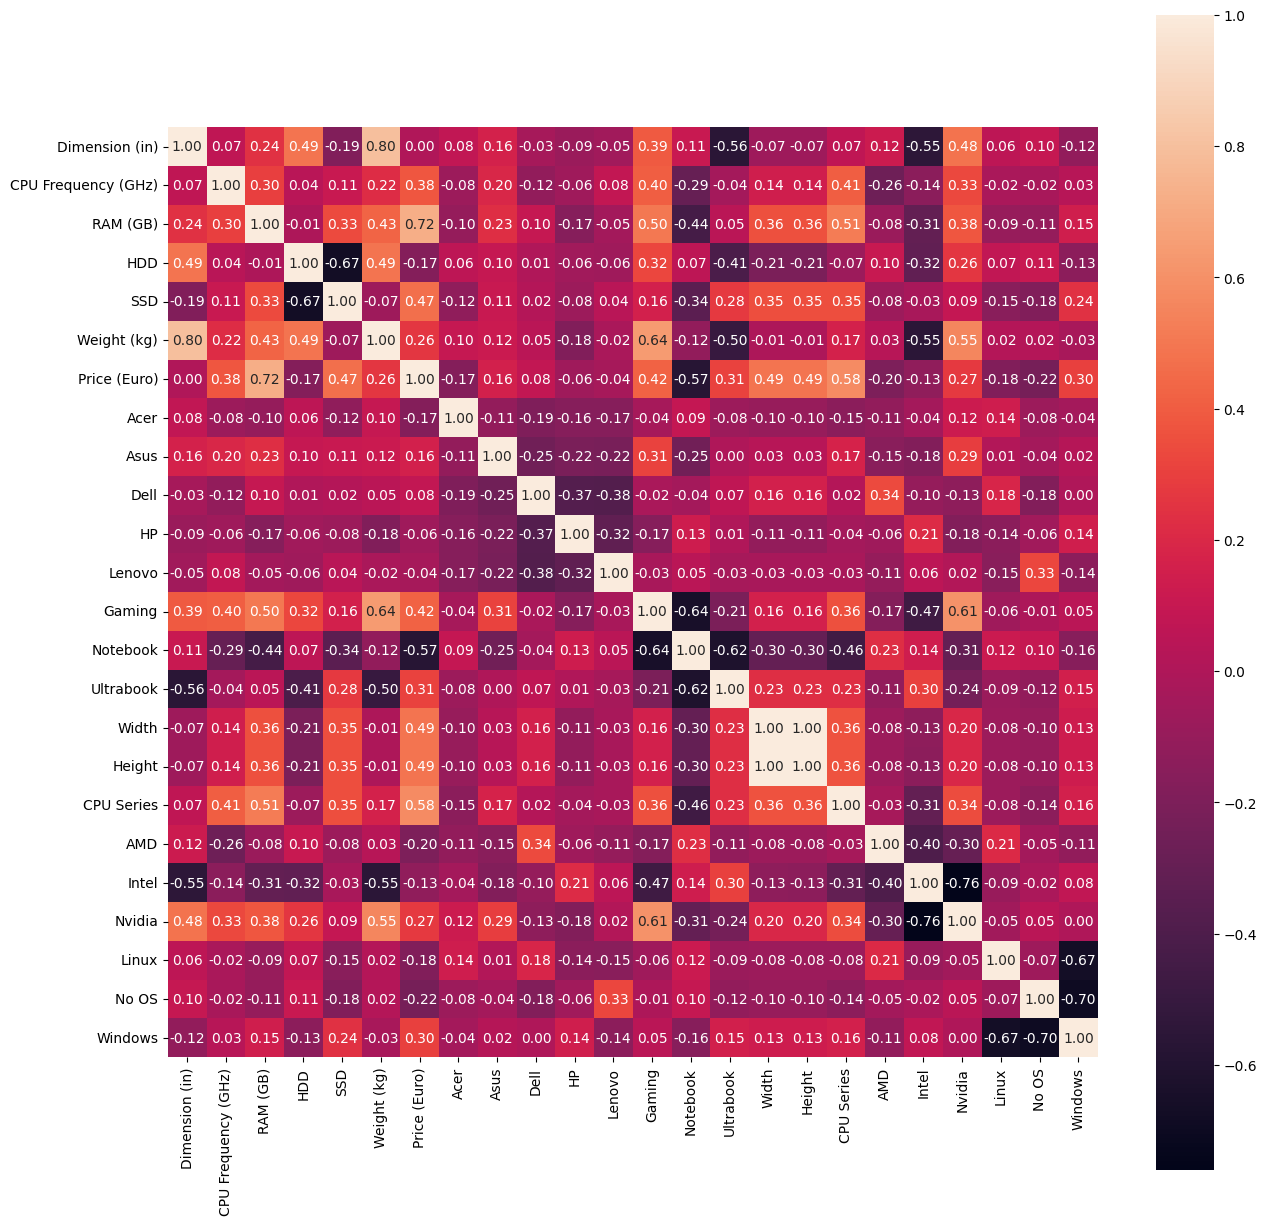

In [58]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", square=True)

<Axes: >

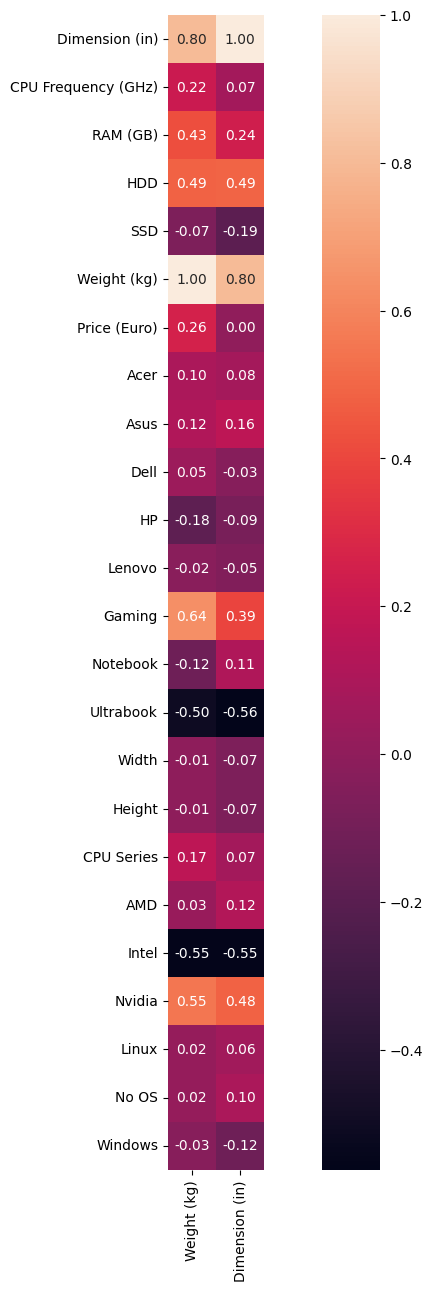

In [59]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(numeric_only=True)[["Weight (kg)", "Dimension (in)"]], annot=True, fmt=".2f", square=True)

In [60]:
cols = ["Weight (kg)", "Dimension (in)"]
iterative_imputer = IterativeImputer()
df[cols] = iterative_imputer.fit_transform(df[cols])

In [61]:
df.isnull().sum()


Dimension (in)          0
CPU Frequency (GHz)     0
RAM (GB)                0
HDD                     0
SSD                     0
Weight (kg)             0
Price (Euro)           10
Acer                    0
Asus                    0
Dell                    0
HP                      0
Lenovo                  0
Gaming                  0
Notebook                0
Ultrabook               0
Width                   0
Height                  0
CPU Series              0
AMD                     0
Intel                   0
Nvidia                  0
Linux                   0
No OS                   0
Windows                 0
dtype: int64

In [62]:
df.dropna(subset=["Price (Euro)"], axis=0, inplace=True)
#redicite kaj so se 0 samo drop

In [63]:
df.isnull().sum()


Dimension (in)         0
CPU Frequency (GHz)    0
RAM (GB)               0
HDD                    0
SSD                    0
Weight (kg)            0
Price (Euro)           0
Acer                   0
Asus                   0
Dell                   0
HP                     0
Lenovo                 0
Gaming                 0
Notebook               0
Ultrabook              0
Width                  0
Height                 0
CPU Series             0
AMD                    0
Intel                  0
Nvidia                 0
Linux                  0
No OS                  0
Windows                0
dtype: int64

In [64]:
#SEGA SPLIT

In [65]:
X, y = df.drop(columns=["Price (Euro)"]), df["Price (Euro)"]
#PRICE EURO da gi dvoime

In [66]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)


In [67]:
regressor = KNeighborsRegressor(n_neighbors=3).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 244.54031847133749
MAPE: 0.2312932231054359
MSE: 116959.55751740978
RMSE: 341.99350508073945
R2 Score: 0.6673670332821104


In [68]:
"""После KNN обично следат:
Linear Regression
Random Forest
XGBoost
LightGBM
CatBoost
"""

'После KNN обично следат:\nLinear Regression\nRandom Forest\nXGBoost\nLightGBM\nCatBoost\n'

In [69]:
regressor = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 253.55871203614043
MAPE: 0.2329344542188399
MSE: 136172.500775577
RMSE: 369.0155833776902
R2 Score: 0.6127254250972014


In [70]:
regressor = RandomForestRegressor(
    n_estimators=100,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 208.19485116520073
MAPE: 0.18175205313484624
MSE: 91296.93081933855
RMSE: 302.1538197993508
R2 Score: 0.7403515403505687


In [71]:
regressor = XGBRegressor(
    n_estimators=100,
).fit(train_X, train_y)

pred_y = regressor.predict(test_X)

print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 213.51292100262492
MAPE: 0.1800509490697276
MSE: 104168.88364240596
RMSE: 322.7520466897243
R2 Score: 0.7037437081573571


In [73]:
param_grid = {
    "n_neighbors": range(2, 10 + 1),
}
regressor = KNeighborsRegressor()
grid_search = GridSearchCV(
    regressor,
    param_grid,
    scoring="r2",
    cv=5,
)
grid_search.fit(train_X, train_y)
GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 11)}, scoring='r2')

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': range(2, 11)}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [74]:
grid_search.best_params_


{'n_neighbors': 9}

In [75]:
pred_y = grid_search.predict(test_X)
print(f"MAE: {mean_absolute_error(test_y, pred_y)}")
print(f"MAPE: {mean_absolute_percentage_error(test_y, pred_y)}")
print(f"MSE: {mean_squared_error(test_y, pred_y)}")
print(f"RMSE: {root_mean_squared_error(test_y, pred_y)}")
print(f"R2 Score: {r2_score(test_y, pred_y)}")

MAE: 253.44676574663836
MAPE: 0.23630296457678102
MSE: 123460.54275314932
RMSE: 351.3695245082438
R2 Score: 0.6488782320977236
